In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Add, Activation, Conv1D, Conv2D, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
import numpy as np

2024-01-14 23:40:03.796032: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-14 23:40:03.796068: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-14 23:40:03.797106: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-14 23:40:03.802639: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-14 23:40:04.443070: W tensorflow/compiler/tf2

In [2]:
dataset_npz = np.load('dataset_bottle.npz')

# estrai immagini ed etichette
immagini = dataset_npz['immagini']
etichette = dataset_npz['etichette']

In [3]:
# creadataset 

dataset = tf.data.Dataset.from_tensor_slices((immagini, etichette))

2024-01-14 23:40:13.308743: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-14 23:40:13.534486: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-14 23:40:13.534923: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
images_train, images_test, label_train, label_test = train_test_split(immagini, etichette, test_size=0.2, random_state=42)

In [5]:
print(images_train.shape)

(12, 28, 28, 3)


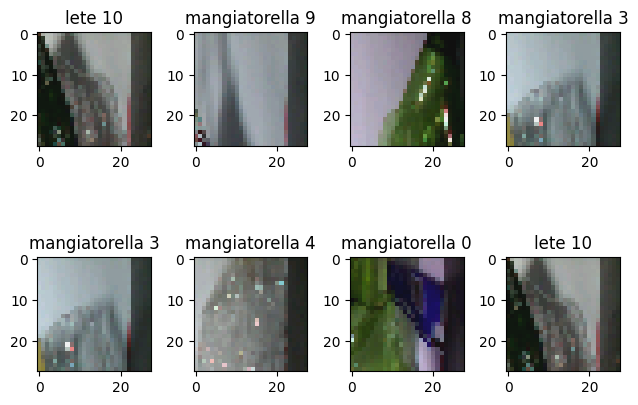

In [6]:
# stampa le prime 10 immagini
import random


width = images_train.shape[1] # 28
height = images_train.shape[2] # 28
rows = 2
cols = 4
axes = []
fig = plt.figure()

for a in range(rows * cols):
    n = random.randrange(images_train.shape[0])
    b = images_train[n]
    e = etichette[n]
    axes.append(fig.add_subplot(rows, cols, a + 1))
    subplot_title = f"{e} {str(n)}"
    axes[-1].set_title(subplot_title)
    plt.imshow(b)
fig.tight_layout()
plt.show()

In [7]:
#### Inizio lavoro sulla rete neurale --- Data Preprossing

print(images_train.shape)

# images_train = images_train.reshape(60000,28,28,1)
# images_test = images_test.reshape(10000,28,28,1)

# print(images_train.shape)



(12, 28, 28, 3)


In [8]:
# normalizzo
images_train = images_train/255
images_test = images_test/255 

In [33]:
new_label_train = []
new_label_test = []

for label in label_train:
    match label:
            case "lete":
                new_label_train.append(1)
            case "mangiatorella":
                new_label_train.append(2)
            case "santanna":
                new_label_train.append(3)
            case _:
                new_label_train.append(0)
                
for label in label_test:
    match label:
            case "lete":
                new_label_test.append(1)
            case "mangiatorella":
                new_label_test.append(2)
            case "santanna":
                new_label_test.append(3)
            case _:
                new_label_test.append(0)

# print(new_label_train)
# print(new_label_test)

new_label_train = to_categorical(new_label_train)
new_label_test = to_categorical(new_label_test)

new_label_train[0]

array([0., 1., 0., 0.], dtype=float32)

In [31]:
from tensorflow.keras.layers import Dense, Input, Add, Activation, Conv1D, Conv2D, Flatten, Conv3D
from tensorflow.keras.optimizers.legacy import Adam

In [34]:
shape_value = images_train.shape[0] # 28x28 -> 784
print(shape_value)

input = Input(shape=(28,28,3)) # posso creare anche custom objects che userò successivamente senza ripetere tutto.

conv_0 = Conv2D(
        64, 
        kernel_size=3, 
        activation='relu', 
        input_shape=(28,28,3) # This is the shape of each input image, 28,28,1 with the 1 signifying that the images are greyscale.
    )(input)

conv_1 = Conv2D(
        32, 
        kernel_size=3, 
        activation='relu', 
        input_shape=(28,28,3) # This is the shape of each input image, 28,28,1 with the 1 signifying that the images are greyscale.
    )(conv_0)

# dense_0 = Dense(units=64, activation='relu')(conv_0)

# residual_0 = Add()([conv_1, conv_2])
# residual_0 = Activation('swish')(residual_0) # torna indietro con la derivata prima parziale della funzione relu


# flatten_0 = Flatten()(residual_0)
flatten_0 = Flatten()(conv_1)

output = Dense(
        units=4, 
        activation='softmax' # Softmax makes the output sum up to 1 so the output can be interpreted as probabilities.
    )(flatten_0)


model = tf.keras.models.Model(
    inputs=[input],
    outputs=[output],
    name="Conv-Bottle"
)

model.summary()


12
Model: "Conv-Bottle"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_3 (Dense)             (None, 4)                 73732     
                                                                 
Total params: 93988 (367.14 KB)
Trainable params: 93988 (367.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [36]:
history_res = model.fit(
    x=images_train,
    y=new_label_train,
    epochs=10,
    batch_size=512,
    validation_data=(
        images_test,
        new_label_test
    )
)

Epoch 1/10
1/1 [==============================] - 0s 329ms/step - loss: 1.3935 - accuracy: 0.4167 - val_loss: 4.6863 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 21ms/step - loss: 2.2369 - accuracy: 0.4167 - val_loss: 1.4698 - val_accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 0s 22ms/step - loss: 1.8620 - accuracy: 0.3333 - val_loss: 1.3453 - val_accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 21ms/step - loss: 1.3557 - accuracy: 0.5000 - val_loss: 1.4552 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 20ms/step - loss: 1.3254 - accuracy: 0.4167 - val_loss: 1.1188 - val_accuracy: 0.3333
Epoch 6/10
1/1 [==============================] - 0s 22ms/step - loss: 1.0057 - accuracy: 0.5833 - val_loss: 1.3937 - val_accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 0s 20ms/step - loss: 0.9550 - accuracy: 0.4167 - val_loss: 0.9966 - val_accuracy: 0.6667
Epoch 8/10
1/1 [==

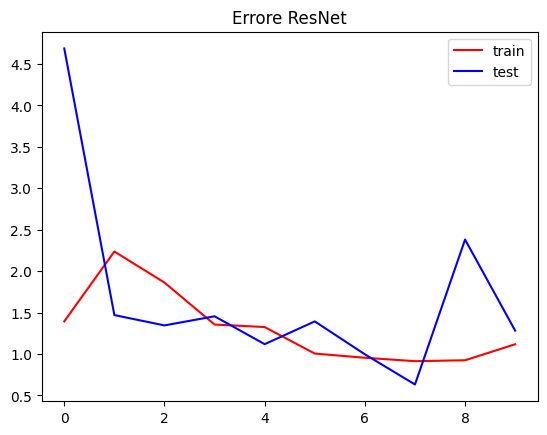

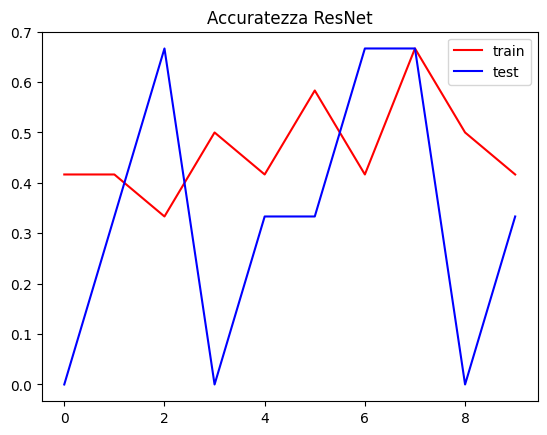

In [37]:
# Stampe i risultati

# errore modello
plt.plot(history_res.history['loss'], color='red', label='train')
plt.plot(history_res.history['val_loss'], color='blue', label='test')
plt.title('Errore ResNet' )
plt.legend()
plt.show()

# Accuratezza del modello
plt.plot(history_res.history['accuracy'], color='red', label='train')
plt.plot(history_res.history['val_accuracy'], color='blue', label='test')
plt.title("Accuratezza ResNet")
plt.legend()
plt.show()

In [38]:
evaluations_res = model.evaluate(
    images_test,
    new_label_test
)

for i in range(0, len(model.metrics_names)):
    print(f"{model.metrics_names[i]} -> {evaluations_res[i]}")

1/1 [==============================] - 0s 18ms/step - loss: 1.2819 - accuracy: 0.3333
loss -> 1.2819414138793945
accuracy -> 0.3333333432674408
